In [1]:
#%%capture
%run input/Format.ipynb
import ROOT as root
from array import array
import numpy as np
root.gErrorIgnoreLevel = root.kFatal
%jsroot on
root.gStyle.SetOptStat(0)

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Welcome to JupyROOT 6.30/06


In [2]:
is_sDCA = 0
is_new = 7
do_scale_folder = 0
html_print = True
save_to_pdf = False
like_sign = 1
ref_option = 2

In [3]:
isigma = 2
N_centr = 6
N_options = 6
N_vtx_bins = 4
N_rp_bins = 1 
centrality = [0,9,0,1,2,3,4,5,6,9,4,9]
if is_new: N_vtx_bins, N_rp_bins = 2, 2
if is_new==3: N_options, N_vtx_bins, N_rp_bins = 12,1, 2
if is_new==4: N_options, N_vtx_bins, N_rp_bins = 24,1, 1
if is_new==5: N_options, N_vtx_bins, N_rp_bins = 30,1, 1
if is_new==6: N_options, N_vtx_bins, N_rp_bins, centrality = 33, 1, 2, [0,4,0,0,1,1,2,2,3,4,2,4]
if is_new==7: N_options, N_vtx_bins, N_rp_bins, centrality = 23, 1, 1, [0,4,0,0,1,1,2,2,3,4,2,4]
phi_v_low,phi_v_high,pt_low,pt_high = 1,40,1,16
centralities = ["0-93%","0-20%","20-40%","40-60%","60-93%","40-93%"]
colors=[1,2,4,6,root.kGreen+2]
file_path="input/"
file_name="m_ee_Run14AuAu_127th_new_19981_707runs.root"
#m_ee_Run14AuAu_127th_new_19981_707runs
#m_ee_Run14AuAu_110th_new_19951_1065runs(sigmalized) m_ee_Run14AuAu_121st_new_19974_485runs (phi0 dc)
#m_ee_Run14AuAu_107th_new_19943_1063runs m_ee_Run14AuAu_108th_new_19946_1065runs
#m_ee_Run14AuAu_105th_new_19929_1051runs m_ee_Run14AuAu_106th_new_19941_1051runs
#m_ee_Run14AuAu_103rd_new_19927_1060runs m_ee_Run14AuAu_104th_new_19928_1056runs
#m_ee_Run14AuAu_100th_new_19922_1047runs  m_ee_Run14AuAu_101st_new_19924_1062runs
#m_ee_Run14AuAu_98th_new_19918_1064runs m_ee_Run14AuAu_99th_new_19920_1063runs
#m_ee_Run14AuAu_95th_new_19914_1065runs m_ee_Run14AuAu_96th_new_19915_1065runs
#m_ee_Run14AuAu_91st_new_19891_1061runs m_ee_Run14AuAu_92nd_new_19900_1065runs
#m_ee_Run14AuAu_90th_new_19887_1065runs m_ee_Run14AuAu_89th_new_19877_942runs
dca_file_path="output/files/"
dca_file_names=["note/new_m_ee_DCA_16.root"]
hist_names = ["reb_ratio_FG_BG","syst_reb_ratio_FG_BG"]
N_type = len(hist_names)

In [4]:
hists_read = []

for iFile in range(len(dca_file_names)):
    infile = root.TFile.Open(dca_file_path+dca_file_names[iFile], "read")
    hists_emc_read0 = []
    for itype in range(N_type):
        hist_select_3D0 = []
        for icentr in range(N_centr):
            hist_select_3D0.append(infile.Get(hist_names[itype]+f"_{icentr}{0}"))
            hist_select_3D0[-1].SetDirectory(root.nullptr)
            hist_select_3D0[-1].SetName(hist_select_3D0[-1].GetName()+f"{iFile}")
        hists_emc_read0.append(hist_select_3D0)
    hists_read.append(hists_emc_read0)

    infile.Close()

In [5]:
hists_ep_FG_read, hists_ep_BG_read, hists_ee_FG_read, hists_ee_BG_read = [], [], [], []
hist_stat_read=[]
infile = root.TFile.Open(file_path+file_name, "read")

for iOpt in range(0,N_options):
    histo_name = [f"inv_mass_ee_DCA_V{iOpt}_",f"inv_mass_ee_sDCA_V{iOpt}_"]
    histo_name_like = [f"delt_phi_ee_DCA_V{iOpt}_",f"delt_phi_ee_sDCA_V{iOpt}_"]
    if is_new > 3: histo_name_like = [f"delt_phi_ee_DCA_V{0}_",f"delt_phi_ee_sDCA_V{0}_"]
    #print(histo_name)
    hists_ep_FG_read_centr, hists_ep_BG_read_centr, hists_ee_FG_read_centr, hists_ee_BG_read_centr = [], [], [], []
    hist_stat_centr = []
    for icent in range(N_centr):
        hist_FG = infile.Get("c00_z00_r00/"+histo_name[is_sDCA]+"FG12")
        hist_FG.Add(hist_FG,-1)
        hist_FG.SetDirectory(root.nullptr)
        hist_BG = infile.Get("c00_z00_r00/"+histo_name[is_sDCA]+"BG12")
        hist_BG.Add(hist_BG,-1)
        hist_BG.SetDirectory(root.nullptr)
        hist_FG_like = infile.Get("c00_z00_r00/"+histo_name[is_sDCA]+"FG11")
        hist_FG_like.Add(hist_FG_like,-1)
        hist_FG_like.SetDirectory(root.nullptr)
        hist_BG_like = infile.Get("c00_z00_r00/"+histo_name[is_sDCA]+"BG11")
        hist_BG_like.Add(hist_BG_like,-1)
        hist_BG_like.SetDirectory(root.nullptr)
        hist_stat = infile.Get("c00_z00_r00/PoolStatistics")
        hist_stat.Add(hist_stat,-1)
        hist_stat.SetDirectory(root.nullptr)
        for i in range(centrality[icent*2],centrality[icent*2+1]+1):
            for j in range(N_vtx_bins):
                for t in range(N_rp_bins):
                    for k in range(is_sDCA,1+is_sDCA):
                        dirname=f"c0{i}_z0{j}_r0{t}/"
                        if i>9: dirname=f"c{i}_z0{j}_r0{t}/"
                        hist_FG_local = infile.Get(dirname+histo_name[k]+"FG12")
                        hist_BG_local = infile.Get(dirname+histo_name[k]+"BG12")
                        hist_FG_like_local = infile.Get(dirname+histo_name[k]+"FG11")
                        hist_BG_like_local = infile.Get(dirname+histo_name[k]+"BG11")
                        hist_FG_like_local.Add(infile.Get(dirname+histo_name[k]+"FG22"))
                        hist_BG_like_local.Add(infile.Get(dirname+histo_name[k]+"BG22"))
                        eta_FG_porj = hist_FG_like_local.ProjectionX(f"FG_loc_{icent}_{i*20+j}",phi_v_low,phi_v_high,pt_low,pt_high)
                        eta_BG_porj = hist_BG_like_local.ProjectionX(f"BG_loc_{icent}_{i*20+j}",phi_v_low,phi_v_high,pt_low,pt_high)

                        left = eta_FG_porj.FindBin(1.3)
                        right = eta_FG_porj.FindBin(1.9)+1

                        scale = eta_FG_porj.Integral(left,right)/(eta_BG_porj.Integral(left,right)+0.1)
                        if not do_scale_folder: scale = 1

                        hist_FG.Add(hist_FG_local)
                        hist_BG.Add(hist_BG_local,scale)
                        hist_FG_like.Add(hist_FG_like_local)
                        hist_BG_like.Add(hist_BG_like_local,scale)
                        hist_stat.Add(infile.Get(dirname+"PoolStatistics"))

        hists_ep_FG_read_centr.append(hist_FG)
        hists_ep_BG_read_centr.append(hist_BG)
        hists_ee_FG_read_centr.append(hist_FG_like)
        hists_ee_BG_read_centr.append(hist_BG_like)
        hist_stat_centr.append(hist_stat)
    hists_ep_FG_read.append(hists_ep_FG_read_centr)
    hists_ep_BG_read.append(hists_ep_BG_read_centr)
    hists_ee_FG_read.append(hists_ee_FG_read_centr)
    hists_ee_BG_read.append(hists_ee_BG_read_centr)
    hist_stat_read.append(hist_stat_centr)

infile.Close()

In [6]:
iOption = 11
rebin = 1
new_m_array = array( 'd', [0.,0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.725,0.8,0.875,0.95,1.0,1.05,1.15,1.3,1.5,1.75,2.0,2.25,2.5,2.75,2.9,3.0,3.05,3.1,3.15,3.2,3.3,3.45,3.55,3.65,3.75,3.85,4.5])
N_new_bins = len(new_m_array)-1
#print(N_new_bins)

N_inv_m = 35  
inv_m_bins = array( 'd', [0.,0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.725,0.8,0.875,0.95,1.0,1.05,1.15,1.3,1.5,1.75,2.0,2.25,2.5,2.75,2.9,3.0,3.05,3.1,3.15,3.2,3.3,3.45,3.55,3.65,3.75,3.85,4.5])

N_DCA = 40  
DCA_bins = array( 'd', [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,350,400,450,500,600,700,800,900,1000,1100,1200,1300,1400,1600,1800,2000,3000])
if is_new==2: DCA_bins = array( 'd', [-100000, -5000, -3000, -1500, -1000, -800, -600, -450, -350, -260, -220,-180, -150, -130, -110, -90, -70, -50, -30, -15, -5, 0, 5, 15, 30, 50, 70, 90, 110, 130, 150, 180, 220, 260, 350, 450, 600, 800, 1000, 1500, 3000, 5000, 100000])
if is_new ==7: DCA_bins = array( 'd', [   -3100, -2700, -2300, -1900,   -1500, -1300, -1100, -900, -700, -600, -500, -400,-300, -250, -200, -150,-100, -75, -50, -25, 0, 25, 50, 75, 100, 150, 200, 250, 300, 400, 500, 600, 700,900, 1100, 1300, 1500, 1900, 2300, 2700, 3100   ])

N_sDCA = 35  
sDCA_bins = array( 'd', [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.2,2.4,2.6,2.8,3.0,3.5,4.0,4.5,5.0,6.0,7.0,8.0,9.0,10,20])

N_pt = 16
pt_array = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.4,1.6,2.0,2.5,3.0]


In [7]:
if like_sign:
    for jOption in range(2,16):
        for icentr in range(N_centr):
            for zbin in range(1,1+hists_ee_BG_read[jOption][icentr].GetNbinsZ()):
                for ybin in range(1,1+hists_ee_BG_read[jOption][icentr].GetNbinsY()):
                    for xbin in range(1,1+hists_ee_BG_read[jOption][icentr].GetNbinsX()):
                        ep_bg = hists_ep_BG_read[jOption][icentr].GetBinContent(xbin,ybin,zbin)
                        ybin_ref = min(ybin, hists_ee_BG_read[ref_option][icentr].GetNbinsY())
                        xbin_ref = min(xbin, 300)
                        ee_bg = hists_ee_BG_read[ref_option][icentr].GetBinContent(xbin_ref,ybin_ref,zbin)
                        if ee_bg == 0: newbin, new_er = 0, 0
                        else: 
                            newbin = ( (hists_ee_FG_read[ref_option][icentr].GetBinContent(xbin_ref,ybin_ref,zbin) ) ) *ep_bg/( (ee_bg) )
                            if icentr == 0 and False: print(xbin, newbin/ep_bg ) 
                            new_er = newbin * ( 1./(hists_ee_FG_read[ref_option][icentr].GetBinContent(xbin_ref,ybin_ref,zbin)+1) )**0.5#  2.0*( (*hists_pp_FG_read[iOption][icentr].GetBinContent(xbin,ybin,zbin) )**0.5 ) *ep_bg/( 2.0 * (pp_bg*ee_bg)**0.5 )
                            new_er = min(new_er, newbin)
                        hists_ep_BG_read[jOption][icentr].SetBinContent(xbin,ybin,zbin,newbin)
                        hists_ep_BG_read[jOption][icentr].SetBinError(xbin,ybin,zbin,new_er)

In [8]:
def rescale_1dhist(hist):
    for ibin in range(1,1+hist.GetNbinsX()):
        hist.SetBinError(ibin,hist.GetBinContent(ibin)**0.5/hist.GetBinWidth(ibin))
        hist.SetBinContent(ibin,hist.GetBinContent(ibin)/hist.GetBinWidth(ibin))

In [27]:
c5 = root.TCanvas("ccc33","ccc33",1400,1000)
iOption = 11
rebin = 1
is_sub = 0
pt_low, pt_high = 1, 16
#print(pt_array[pt_low],pt_array[pt_high])
c5.Divide(1,1)
legends =[]
projs,projs_BG=[],[]

for icentr in range(1):
    c5.cd(icentr+1)
    Nnn = N_DCA
    DCA_hist_2D_FG = root.TH2D(f"DCA_FG_{icentr}_{iOption}",f"DCA_FG_{icentr}_{iOption}",180,0,4.5,80,0,2000)
    DCA_hist_2D_BG = root.TH2D(f"DCA_BG_{icentr}_{iOption}",f"DCA_BG_{icentr}_{iOption}",180,0,4.5,80,0,2000)
    
    hists_out = [DCA_hist_2D_FG, DCA_hist_2D_BG]

    hists_in = [hists_ep_FG_read[iOption][icentr], hists_ep_BG_read[iOption][icentr]]
    
    sub = 0
    for iy in range(1, 1+80):
        for ix in range(1,1+180):
            for ihist in range(2):
                content = 0.    
                for iz in range(pt_low,1+pt_high):
                    content += hists_in[ihist].GetBinContent(ix,iy,iz)
                hists_out[ihist].SetBinContent(ix-sub,iy,hists_out[ihist].GetBinContent(ix-sub,iy)*0+ content)
                hists_out[ihist].SetBinError(ix-sub,iy,+ content**0.5)
    hists_out[0].Add(hists_out[1],-is_sub)
    proj = hists_out[0].ProfileX()
    proj_BG = hists_out[1].ProfileX()
    proj.Rebin(rebin)
    proj_BG.Rebin(rebin)
    #proj.SetAxisRange(1.15,4.5)
    proj_BG.Scale(1)
    Format_Hist_total(proj,"m_{ee}, GeV","#LTDCA_{T}#GT, #mum",0.17,0.13,0.01,0.01,0.07,0.06,21,2,4,3,4,0.85,1.2)
    Format_Graph(proj_BG,49,2,2,3,2)
    #root.gPad.SetLogy(1)
    #proj.Divide(proj_BG)
    proj.SetMaximum(245)
    proj.Draw("p")
    if not is_sub:proj_BG.Draw("same p")
    proj.Draw("same p")
    proj.GetXaxis().SetNdivisions(505)
    proj.GetYaxis().SetNdivisions(50510)
    legends.append(root.TLegend(0.4,0.7,0.9,0.95,"Au+Au "+centralities[icentr]))
    legends[-1].AddEntry(proj,"FG","pl")
    legends[-1].AddEntry(proj_BG,"BG","pl")
    Format_Legend(legends[-1],0.08)
    legends[-1].Draw()

#root.PHENIXTools.DrawPreliminary(0.6, 0.5, 0.3)

c5.Draw()
if save_to_pdf: c5.Print("output/Note/DCA_FG_BG.pdf")

In [22]:
c5 = root.TCanvas("ccc33","ccc33",1400,1000)
iOption = 11
rebin = 1
is_sub = 0
pt_low, pt_high = 1, 16
#print(pt_array[pt_low],pt_array[pt_high])
c5.Divide(1,1)
legends =[]
projs,projs_BG=[],[]

for icentr in range(1):
    c5.cd(icentr+1)
    Nnn = N_DCA
    DCA_hist_2D_FG = root.TH2D(f"DCA_FG_{icentr}_{iOption}",f"DCA_FG_{icentr}_{iOption}",N_inv_m,inv_m_bins,N_DCA,DCA_bins)
    DCA_hist_2D_BG = root.TH2D(f"DCA_BG_{icentr}_{iOption}",f"DCA_BG_{icentr}_{iOption}",N_inv_m,inv_m_bins,N_DCA,DCA_bins)
    
    hists_out = [DCA_hist_2D_FG, DCA_hist_2D_BG]

    hists_in = [hists_ep_FG_read[iOption][icentr], hists_ep_BG_read[iOption][icentr]]
    
    sub = 0
    for iy in range(1, 1+Nnn):
        for ix in range(1,1+N_inv_m):
            for ihist in range(2):
                content = 0.    
                for iz in range(pt_low,1+pt_high):
                    content += hists_in[ihist].GetBinContent(ix,iy,iz)
                hists_out[ihist].SetBinContent(ix-sub,iy,hists_out[ihist].GetBinContent(ix-sub,iy)*0+ content)
                hists_out[ihist].SetBinError(ix-sub,iy,+ content**0.5)
    hists_out[0].Add(hists_out[1],-is_sub)
    proj = hists_out[0].ProfileX()
    proj_BG = hists_out[1].ProfileX()
    proj.Rebin(rebin)
    proj_BG.Rebin(rebin)
    #proj.SetAxisRange(1.15,4.5)
    proj_BG.Scale(1)
    Format_Hist_total(proj,"m_{ee}, GeV","#LTDCA_{T}#GT, #mum",0.17,0.13,0.01,0.01,0.07,0.06,21,2,4,3,4,0.85,1.2)
    Format_Graph(proj_BG,49,2,2,3,2)
    #root.gPad.SetLogy(1)
    #proj.Divide(proj_BG)
    proj.SetMaximum(245)
    proj.Draw("p")
    if not is_sub:proj_BG.Draw("same p")
    proj.Draw("same p")
    proj.GetXaxis().SetNdivisions(505)
    proj.GetYaxis().SetNdivisions(50510)
    legends.append(root.TLegend(0.4,0.7,0.9,0.95,"Au+Au "+centralities[icentr]))
    legends[-1].AddEntry(proj,"FG","pl")
    legends[-1].AddEntry(proj_BG,"BG","pl")
    Format_Legend(legends[-1],0.08)
    legends[-1].Draw()

#root.PHENIXTools.DrawPreliminary(0.6, 0.5, 0.3)

c5.Draw()
if save_to_pdf: c5.Print("output/Note/DCA_FG_BG.pdf")

In [10]:
# --- Parameters ---
mu = 0.0
sigma = 100.0        # If you have FWHM instead, set: sigma = FWHM / (2*np.sqrt(2*np.log(2)))
n_samples = 200_000  # number of (X,Y) pairs

# Reproducible RNG
rng = np.random.default_rng(12345)

# --- Generate two independent Gaussian variables ---
X = rng.normal(mu, sigma, size=n_samples)
Y = rng.normal(mu, sigma, size=n_samples)

# --- Compute R = sqrt(X^2 + Y^2) ---
R = np.hypot(X, Y)   # numerically stable sqrt(X**2 + Y**2)

# --- (Optional) check moments ---
mean_theory = sigma * np.sqrt(np.pi / 2)
sd_theory = sigma * np.sqrt((4 - np.pi) / 2)
print(f"Empirical mean(R) = {R.mean():.1f}")
print(f"Theoretical mean  = {mean_theory:.1f} (Rayleigh with parameter sigma)")
print(f"Empirical std(R)  = {R.std(ddof=1):.1f}")
print(f"Theoretical std   = {sd_theory:.1f}  (Rayleigh with parameter sigma)")

# --- Plot histogram of R and overlay Rayleigh PDF using ROOT ---
c1 = root.TCanvas("c1", "Rayleigh Distribution", 800, 600)

# Histogram of R
hist = root.TH1D("hR", "R from two independent Gaussian draws (#mu=0, #sigma=100);R=#sqrt{X^{2}+Y^{2}};dN/dR", 200, 0, np.max(R))
for r in R:
    hist.Fill(r)
hist.Scale(1.0 / hist.Integral("width"))  # Normalize to density

hist.SetLineColor(root.kBlue+1)
hist.SetFillColorAlpha(root.kBlue, 0.3)
hist.Draw("HIST")
#root.gStyle.SetOptStat(0)  # Disable statistics box
# Rayleigh PDF for comparison
rayleigh_graph = root.TGraph(500)
for i, r_val in enumerate(np.linspace(0, np.max(R), 500)):
    pdf = (r_val / sigma**2) * np.exp(-r_val**2 / (2 * sigma**2))
    rayleigh_graph.SetPoint(i, r_val, pdf)
rayleigh_graph.SetLineColor(root.kRed)
rayleigh_graph.SetLineWidth(3)
rayleigh_graph.Draw("L SAME")

# Legend
legend = root.TLegend(0.5, 0.7, 0.88, 0.88)
legend.AddEntry(hist, "Histogram of R", "f")
legend.AddEntry(rayleigh_graph, "Rayleigh PDF (#sigma=100)", "l")
legend.Draw()
c1.Draw()


Empirical mean(R) = 125.2
Theoretical mean  = 125.3 (Rayleigh with parameter sigma)
Empirical std(R)  = 65.5
Theoretical std   = 65.5  (Rayleigh with parameter sigma)


In [11]:
c5 = root.TCanvas("ccc33","ccc33",1400,1000)
iOption = 16
rebin = 1
is_sub = 0
pt_low, pt_high = 8, 16
#print(pt_array[pt_low],pt_array[pt_high])
c5.Divide(1,1)
legends =[]
projs,projs_BG=[],[]

for icentr in range(1):
    c5.cd(icentr+1)
    Nnn = N_DCA
    DCA_hist_2D_FG = root.TH2D(f"DCA_FG_{icentr}_{iOption}",f"DCA_FG_{icentr}_{iOption}",N_inv_m,inv_m_bins,N_DCA,DCA_bins)
    DCA_hist_2D_BG = root.TH2D(f"DCA_BG_{icentr}_{iOption}",f"DCA_BG_{icentr}_{iOption}",N_inv_m,inv_m_bins,N_DCA,DCA_bins)
    
    hists_out = [DCA_hist_2D_FG, DCA_hist_2D_BG]

    hists_in = [hists_ep_FG_read[iOption][icentr], hists_ep_BG_read[iOption][icentr]]
    
    sub = 0
    for iy in range(1, 1+Nnn):
        for ix in range(1,1+N_inv_m):
            for ihist in range(2):
                content = 0.    
                for iz in range(pt_low,1+pt_high):
                    content += hists_in[ihist].GetBinContent(ix,iy,iz)
                hists_out[ihist].SetBinContent(ix-sub,iy,hists_out[ihist].GetBinContent(ix-sub,iy)*0+ content)
                hists_out[ihist].SetBinError(ix-sub,iy,+ content**0.5)
    
    proj = hists_out[0].ProfileX()
    proj_BG = hists_out[1].ProfileX()
    proj.Rebin(rebin)
    proj_BG.Rebin(rebin)
    SG_hist = hists_read[0][0][icentr].Rebin(1,hists_read[0][0][icentr].GetName()+f"SG_{icentr}_{iOption}")
    SG_hist_syst = hists_read[0][1][icentr].Rebin(1,hists_read[0][1][icentr].GetName()+f"SG_{icentr}_{iOption}")
    proj_BG.Scale(1.0)

    for ibin in range(1,1+proj.GetNbinsX()):
        newbin = ( proj.GetBinContent(ibin) - proj_BG.GetBinContent(ibin) ) / hists_read[0][0][icentr].GetBinContent(ibin) + proj.GetBinContent(ibin)
        newbin_err_stat = ( ( ( proj.GetBinError(ibin) ) / hists_read[0][0][icentr].GetBinContent(ibin) )**2 + proj.GetBinError(ibin)**2)**0.5
        newbin_err_syst = ( SG_hist_syst.GetBinContent(ibin)**2 + ( 0.01*proj_BG.GetBinContent(ibin) )**2 )**0.5 / hists_read[0][0][icentr].GetBinContent(ibin)
        SG_hist.SetBinContent(ibin,newbin)
        SG_hist_syst.SetBinContent(ibin,newbin)
        SG_hist.SetBinError(ibin,newbin_err_stat)
        SG_hist_syst.SetBinError(ibin,newbin_err_syst)
    hists_out[0].Add(hists_out[1],-is_sub)
    #proj.SetAxisRange(1.15,4.5)
    proj_BG.Scale(1)
    Format_Hist_total(proj,"m_{ee}, GeV","#LTDCA_{T}#GT, #mum",0.17,0.13,0.01,0.01,0.07,0.06,21,2,4,3,4,0.85,1.2)
    Format_Graph(proj_BG,49,2,2,3,2)
    Format_Graph(SG_hist,24,2,1,3,1)
    SG_hist_syst.SetFillColorAlpha(1,0.3)
    proj.Draw("p")
    if not is_sub:proj_BG.Draw("same p")
    proj.Draw("same p")
    SG_hist.Draw("same p")
    SG_hist_syst.Draw("same e2")
    proj.GetXaxis().SetNdivisions(505)
    proj.GetYaxis().SetNdivisions(50510)
    legends.append(root.TLegend(0.4,0.7,0.9,0.95,"Au+Au "+centralities[icentr]))
    legends[-1].AddEntry(proj,"FG","pl")
    legends[-1].AddEntry(proj_BG,"BG","pl")
    Format_Legend(legends[-1],0.08)
    legends[-1].Draw()

c5.Draw()
if save_to_pdf: c5.Print("output/Note/DCA_FG_BG.pdf")

In [12]:
c5 = root.TCanvas("ccc33","ccc33",1000,1000)
iOption = 11
rebin = 1
is_sub = 0
pt_low, pt_high = 1, 16
#print(pt_array[pt_low],pt_array[pt_high])
c5.Divide(1,1)
legends =[]
projs,projs_BG=[],[]

for icentr in range(0,1):
    c5.cd(icentr+1)
    Nnn = N_DCA
    DCA_hist_2D_FG = root.TH2D(f"DCA_FG_{icentr}_{iOption}",f"DCA_FG_{icentr}_{iOption}",N_inv_m,inv_m_bins,N_DCA,DCA_bins)
    DCA_hist_2D_BG = root.TH2D(f"DCA_BG_{icentr}_{iOption}",f"DCA_BG_{icentr}_{iOption}",N_inv_m,inv_m_bins,N_DCA,DCA_bins)
    
    hists_out = [DCA_hist_2D_FG, DCA_hist_2D_BG]

    hists_in = [hists_ep_FG_read[iOption][icentr], hists_ep_BG_read[iOption][icentr]]
    
    sub = 0
    for iy in range(1, 1+Nnn):
        for ix in range(1,1+N_inv_m):
            for ihist in range(2):
                content = 0.    
                for iz in range(pt_low,1+pt_high):
                    content += hists_in[ihist].GetBinContent(ix,iy,iz)
                hists_out[ihist].SetBinContent(ix-sub,iy,hists_out[ihist].GetBinContent(ix-sub,iy)*0+ content)
                hists_out[ihist].SetBinError(ix-sub,iy,+ content**0.5)
    hists_out[0].Add(hists_out[1],-is_sub)
    proj = hists_out[0].ProfileX(hists_out[0].GetName()+"proj",1,-1,"s")
    proj_BG = hists_out[1].ProfileX(hists_out[1].GetName()+"proj",1,-1,"s")
    proj.Rebin(rebin)
    proj_BG.Rebin(rebin)
    #proj_BG.Scale(1./(2)**0.5)
    #proj.SetAxisRange(1.15,4.5)
    proj_BG.Scale(1)
    Format_Hist_total(proj,"m_{ee} (GeV)","#LTDCA^{pair}_{T}#GT (#mum) in PHENIX acceptance",0.15,0.15,0.01,0.01,0.05,0.05,21,2,4,3,4,0.99,1.5)
    Format_Graph(proj_BG,49,2,2,3,2)
    #root.gPad.SetLogy(1)
    #proj.Divide(proj_BG)
    #proj.SetBinContent(32,1000)
    proj.Draw("p")
    if not is_sub:proj_BG.Draw("same p")
    proj.Draw("same p")
    proj.GetXaxis().SetNdivisions(505)
    proj.GetYaxis().SetNdivisions(50510)
    legends.append(root.TLegend(0.6,0.75,0.8,0.8))
    legends[-1].SetNColumns(2)
    legends[-1].AddEntry(proj,"e^{+}e^{-}","pl")
    #legends[-1].AddEntry(proj_BG,"BG_{e^{+}e^{-}}","pl")
    Format_Legend(legends[-1],0.04)
    legends[-1].Draw()
    legends.append(root.TLegend(0.18,0.89,0.99,0.97,"Run 2014 0%-93% Au+Au #sqrt{s_{NN}} = 200 GeV"))
    Format_Legend(legends[-1],0.04,12)
    legends[-1].Draw()
    legends.append(root.TLegend(0.2,0.83,0.99,0.89,"|y^{e}|<0.35, p_{T}^{e }>0.4 GeV, p_{T}^{ee}>0.0 GeV"))
    Format_Legend(legends[-1],0.04,12)
    legends[-1].Draw()
    proj.SetMinimum(-470)
    proj.SetMaximum(470)

    #"m_{e^{+}e^{-}}, GeV","dN/dm_{e^{+}e^{-}}, GeV^{-1} [In PHENIX Acceptance]"

#root.PHENIXTools.DrawPreliminary(0.2, 0.2, 0.3)

c5.Draw()
if save_to_pdf: c5.Print("output/Note/DCA_FG_BG1.pdf")
#c5.Print("output/Note/DCA_prelim_err0.pdf")

In [13]:
c5 = root.TCanvas("ccc33","ccc33",1000,1000)
iOption = 11
rebin = 1
is_sub = 0
pt_low, pt_high = 1, 16
#print(pt_array[pt_low],pt_array[pt_high])
c5.Divide(1,1)
legends =[]
projs,projs_BG=[],[]

for icentr in range(0,1):
    c5.cd(icentr+1)
    Nnn = N_DCA
    DCA_hist_2D_FG = root.TH1D(f"DCA_sigmas_FG_{icentr}_{iOption}",f"DCA_sigmas_FG_{icentr}_{iOption}",N_inv_m,inv_m_bins)
    DCA_hist_2D_BG = root.TH1D(f"DCA_sigmas_BG_{icentr}_{iOption}",f"DCA_sigmas_BG_{icentr}_{iOption}",N_inv_m,inv_m_bins)
    
    hists_out = [DCA_hist_2D_FG, DCA_hist_2D_BG]

    hists_in = [hists_ep_FG_read[iOption][icentr], hists_ep_BG_read[iOption][icentr]]
    
    sub = 0
    for ix in range(1,1+N_inv_m):
        for ihist in range(2):
            local_proj = hists_in[ihist].ProjectionY(hists_in[ihist].GetName()+f"proj_{ihist}_{ix}",ix,ix,pt_low, pt_high )
            mean = local_proj.GetMean()
            sigma = local_proj.GetRMS()
            rescale_1dhist(local_proj)
            sigma = 300
            local_proj.Fit(f"gaus","Q","",mean-3*sigma,mean+3*sigma)
            if not local_proj.GetFunction("gaus"): continue
            hists_out[ihist].SetBinContent(ix, min(sigma,local_proj.GetFunction("gaus").GetParameter(2)))
            hists_out[ihist].SetBinError(ix, local_proj.GetFunction("gaus").GetParError(2))

    proj = hists_out[0]
    proj_BG = hists_out[1]
    Format_Hist_total(proj,"m_{ee} (GeV)","#LTDCA^{pair}_{T}#GT (#mum) in PHENIX acceptance",0.15,0.15,0.01,0.01,0.05,0.05,21,2,4,3,4,0.99,1.5)
    Format_Graph(proj_BG,49,2,2,3,2)
    proj.Draw("p")
    if not is_sub:proj_BG.Draw("same p")
    proj.Draw("same p")
    proj.GetXaxis().SetNdivisions(505)
    proj.GetYaxis().SetNdivisions(50510)
    legends.append(root.TLegend(0.6,0.75,0.8,0.8))
    legends[-1].SetNColumns(2)
    legends[-1].AddEntry(proj,"e^{+}e^{-}","pl")
    #legends[-1].AddEntry(proj_BG,"BG_{e^{+}e^{-}}","pl")
    Format_Legend(legends[-1],0.04)
    legends[-1].Draw()
    legends.append(root.TLegend(0.18,0.89,0.99,0.97,"Run 2014 0%-93% Au+Au #sqrt{s_{NN}} = 200 GeV"))
    Format_Legend(legends[-1],0.04,12)
    legends[-1].Draw()
    legends.append(root.TLegend(0.2,0.83,0.99,0.89,"|y^{e}|<0.35, p_{T}^{e }>0.4 GeV, p_{T}^{ee}>0.0 GeV"))
    Format_Legend(legends[-1],0.04,12)
    legends[-1].Draw()
    proj.SetMinimum(0)
    proj.SetMaximum(400)

    #"m_{e^{+}e^{-}}, GeV","dN/dm_{e^{+}e^{-}}, GeV^{-1} [In PHENIX Acceptance]"

#root.PHENIXTools.DrawPreliminary(0.2, 0.2, 0.3)

c5.Draw()
#c5.Print("output/Note/DCA_prelim_err0.pdf")

In [14]:
if True:
    m_bin = 400
    iOption = 2
    iOption_ref = 26
    for icentr in range(N_centr):
        for zbin in range(1,1+hists_ep_BG_read[iOption][icentr].GetNbinsZ()):
            for xbin in range(1,1+hists_ep_BG_read[iOption][icentr].GetNbinsX()):
                ep_fg_ref, ep_bg_ref = 0, 0
                xbin_ref = min(xbin, m_bin)
                for ybin in range(1,1+hists_ep_BG_read[iOption][icentr].GetNbinsY()):
                    ep_fg_ref += hists_ep_FG_read[iOption_ref][icentr].GetBinContent(xbin_ref,ybin,zbin)
                    ep_bg_ref += hists_ep_BG_read[iOption_ref][icentr].GetBinContent(xbin_ref,ybin,zbin)
                
                for ybin in range(1,1+hists_ep_BG_read[iOption][icentr].GetNbinsY()):    
                    if ep_bg_ref == 0: newbin, new_er = 0, 0
                    else: 
                        newbin = hists_ep_BG_read[iOption][icentr].GetBinContent(xbin_ref,ybin,zbin)  *ep_fg_ref / ep_bg_ref
                        new_er = newbin * ( 1./(hists_ep_BG_read[iOption][icentr].GetBinContent(xbin_ref,ybin,zbin)+1e-6) +1/(ep_fg_ref+1e-6)  )**0.5#  2.0*( (*hists_pp_FG_read[iOption][icentr].GetBinContent(xbin,ybin,zbin) )**0.5 ) *ep_bg/( 2.0 * (pp_bg*ee_bg)**0.5 )
                    hists_ep_BG_read[iOption][icentr].SetBinContent(xbin,ybin,zbin,newbin)
                    hists_ep_BG_read[iOption][icentr].SetBinError(xbin,ybin,zbin,new_er)

IndexError: list index out of range

In [ ]:
print("Done rescaling", hists_ep_BG_read[28][0].GetSumOfWeights()/hists_ep_BG_read[26][0].GetSumOfWeights(),(hists_ep_BG_read[26][0].GetSumOfWeights()/hists_ep_BG_read[2][0].GetSumOfWeights())**0.5)
print(f"overall norm factor: {(1/0.985**2):.3f} ")

Done rescaling 33.31759439940194 1488.980509490641
overall norm factor: 1.031 


In [ ]:
c5 = root.TCanvas("ccc33","ccc33",1000,1000)
iOption = 2
rebin = 1
is_sub = 0
#print(pt_array[pt_low],pt_array[pt_high])
c5.Divide(1,1)
legends =[]
projs,projs_BG=[],[]
ratios = []
ratios_err = []
for icentr in range(0,1):
    c5.cd(icentr+1)
    
    hists_in = [hists_ep_FG_read[iOption][icentr], hists_ep_BG_read[iOption][icentr]]
    
    bin_low = hists_in[0].GetYaxis().FindBin(200)
    bin_up = hists_in[0].GetYaxis().FindBin(3000)
    for ix in range(1,1+N_inv_m):
        for ipt in range(1,1+N_pt):
            local_proj0 = hists_in[0].ProjectionY(hists_in[ihist].GetName()+f"proj1_{ihist}_{ix}",ix,ix,ipt, ipt )
            local_proj1 = hists_in[1].ProjectionY(hists_in[ihist].GetName()+f"proj2_{ihist}_{ix}",ix,ix,ipt, ipt )

            rescale_1dhist(local_proj0)
            rescale_1dhist(local_proj1)
            scale = local_proj0.Integral(bin_low,bin_up)/(local_proj1.Integral(bin_low,bin_up)+0.001)
            if scale < 0.01: continue
            #scale *= hist_stat_read[iOption][icentr].GetBinContent(31)/hist_stat_read[iOption][icentr].GetBinContent(2)
            scale_err = scale / (0.1+local_proj0.Integral(bin_low,bin_up)**0.5)
            ratios.append(scale)
            ratios_err.append(scale_err)

    x_array = array( 'd', [i for i in range(len(ratios))] )
    y_array = array( 'd', ratios )
    x_array_err = array( 'd', [0.25 for i in range(len(ratios))] )
    y_array_err = array( 'd', ratios_err )
    ratio_graph = root.TGraphErrors(len(x_array), x_array, y_array, x_array_err, y_array_err)
    Format_Graph(ratio_graph,49,2,2,3,2)
    ratio_graph.Draw("ap")
    ratio_graph.Fit("pol0","","",100,300)
    #"m_{e^{+}e^{-}}, GeV","dN/dm_{e^{+}e^{-}}, GeV^{-1} [In PHENIX Acceptance]"

#root.PHENIXTools.DrawPreliminary(0.2, 0.2, 0.3)

c5.Draw()
#c5.Print("output/Note/DCA_prelim_err0.pdf")

****************************************
Minimizer is Linear / Migrad
Chi2                      =      1031.47
NDf                       =          200
p0                        =      700.881   +/-   9.58914     


In [ ]:
c5 = root.TCanvas("ccc33","ccc33",1000,1000)
iOption = 2
rebin = 1
is_sub = 0
m_low, m_high = 1,1
if False: m_low, m_high = 15, 22
pt_low, pt_high = 8, 16
#print(pt_array[pt_low],pt_array[pt_high])
c5.Divide(1,1)
legends =[]
projs,projs_BG=[],[]
h1 = []
for icentr in range(2,3):
    c5.cd(icentr+1)
    h1.append(root.TH1D(f"histsadss_out_{icentr}_{iOption}_proj","",10,-2000,2000))
    h1[-1].SetDirectory(root.nullptr)
    h1[-1].Draw()
    hists_in = [hists_ep_FG_read[iOption][icentr], hists_ep_BG_read[iOption][icentr]]
    
    root.gPad.SetLogy(1)
    proj = hists_in[0].ProjectionY(f"hists_out_{icentr}_{iOption}_proj",m_low, m_high,pt_low,pt_high)
    proj_BG = hists_in[1].ProjectionY(f"hists_out_{icentr}_{iOption}_proj_BG",m_low, m_high,pt_low,pt_high)
    Format_Hist_total(h1[-1],"m_{ee} (GeV)","#LTDCA^{pair}_{T}#GT (#mum) in PHENIX acceptance",0.15,0.15,0.01,0.01,0.05,0.05,21,2,4,3,4,0.99,1.5)
    Format_Graph(proj,20,2,4,3,4)
    Format_Graph(proj_BG,21,2,2,3,2, 0.5)
    proj.SetAxisRange(-500,500)
    for ibin in range(1,1+proj.GetNbinsX()):
        proj.SetBinError(ibin,proj.GetBinContent(ibin)**0.5/proj.GetBinWidth(ibin))
        proj.SetBinContent(ibin,proj.GetBinContent(ibin)/proj.GetBinWidth(ibin))
        proj_BG.SetBinError(ibin,proj_BG.GetBinContent(ibin)**0.5/proj_BG.GetBinWidth(ibin))
        proj_BG.SetBinContent(ibin,proj_BG.GetBinContent(ibin)/proj_BG.GetBinWidth(ibin))
    proj.Rebin(rebin)
    h1[-1].SetMaximum(proj.GetMaximum()*10)
    h1[-1].SetMinimum(1e-6)
    #root.gStyle.SetOptFit(1111)
    proj_BG.Rebin(rebin)
    proj_BG.Scale(proj.Integral(23,30)/proj_BG.Integral(23,30))
    proj.Draw("same p")
    proj_BG.Draw("same p")
    proj.Fit("gaus","","",-200,200)

    #"m_{e^{+}e^{-}}, GeV","dN/dm_{e^{+}e^{-}}, GeV^{-1} [In PHENIX Acceptance]"

#root.PHENIXTools.DrawPreliminary(0.2, 0.2, 0.3)

c5.Draw()
if save_to_pdf: c5.Print("output/Note/DCA_FG_BG1.pdf")
#c5.Print("output/Note/DCA_prelim_err0.pdf")

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      907.407
NDf                       =            3
Edm                       =  1.33718e-06
NCalls                    =           79
Constant                  =      384.475   +/-   2.23084     
Mean                      =      106.023   +/-   0.36006     
Sigma                     =      60.7867   +/-   0.382076     	 (limited)


In [ ]:
def ManualProfileX_Poisson(hist2D, name, title):
    """
    Manually calculate the profile along the X-axis of a 2D histogram using Poisson error.
    
    Parameters:
        hist2D (TH2D): Input 2D histogram.
        name (str): Name of the output profile histogram.
        title (str): Title of the output profile histogram.
    
    Returns:
        TH1D: Profile histogram.
    """
    n_bins_x = hist2D.GetNbinsX()
    n_bins_y = hist2D.GetNbinsY()
    
    # Create a 1D histogram for the profile
    print( hist2D.GetXaxis().GetXmax())
    profile = root.TH1D(name, title, n_bins_x, inv_m_bins)
    
    # Loop over x-axis bins
    for ix in range(1, n_bins_x + 1):
        sum_y = 0.0
        sum_w = 0.0
        
        # Loop over y-axis bins
        for iy in range(1, n_bins_y + 1):
            content = hist2D.GetBinContent(ix, iy)
            y_center = hist2D.GetYaxis().GetBinCenter(iy)
            
            if content > 0:
                sum_y += content * y_center
                sum_w += content
        
        # Calculate the mean and Poisson error
        if sum_w > 0:
            mean = sum_y / sum_w
            profile.SetBinContent(ix, mean)
        else:
            profile.SetBinContent(ix, 0)
            profile.SetBinError(ix, 0)
        
        err_y = 0.0
        if sum_w > 0:
            for iy in range(1, n_bins_y + 8):
                content = hist2D.GetBinContent(ix, iy)
                y_center = hist2D.GetYaxis().GetBinCenter(iy)
                err_y += content * (y_center - mean)**2
            print(inv_m_bins[ix],sum_w, (err_y / sum_w**1)**0.5)
            profile.SetBinError(ix, (err_y / sum_w**1)**0.5)


    
    return profile

In [ ]:
def ManualProfileX(hist2D, name, title):
    """
    Manually calculate the profile along the X-axis of a 2D histogram.
    
    Parameters:
        hist2D (TH2D): Input 2D histogram.
        name (str): Name of the output profile histogram.
        title (str): Title of the output profile histogram.
    
    Returns:
        TH1D: Profile histogram.
    """
    n_bins_x = hist2D.GetNbinsX()
    n_bins_y = hist2D.GetNbinsY()
    
    # Create a 1D histogram for the profile
    profile = root.TH1D(name, title, n_bins_x, hist2D.GetXaxis().GetXmin(), hist2D.GetXaxis().GetXmax())
    
    # Loop over x-axis bins
    for ix in range(1, n_bins_x + 1):
        sum_y = 0.0
        sum_w = 0.0
        sum_w2 = 0.0  # For error calculation
        
        # Loop over y-axis bins
        for iy in range(1, n_bins_y + 1):
            content = hist2D.GetBinContent(ix, iy)
            error = hist2D.GetBinContent(ix, iy)**0.5
            
            if content > 0:
                sum_y += content * hist2D.GetYaxis().GetBinCenter(iy)
                sum_w += content
                sum_w2 += (error ** 2) * (hist2D.GetYaxis().GetBinCenter(iy) ** 2)
        
        # Calculate the mean and error
        if sum_w > 0:
            mean = sum_y / sum_w
            error = (sum_w2 / (sum_w ** 2)) ** 0.5
            profile.SetBinContent(ix, mean)
            profile.SetBinError(ix, error)
        else:
            profile.SetBinContent(ix, 0)
            profile.SetBinError(ix, 0)
    
    return profile

# Example usage
c5 = root.TCanvas("ccc33", "ccc33", 1000, 1000)

# Create a manual profile
#print(hists_in[0].GetBinContent(1,1))
profile = ManualProfileX_Poisson(hists_out[0], "profile_manual", "Manual Profile")
profile_bg = ManualProfileX_Poisson(hists_out[1], "profile_manual_bg", "Manual Profile")

# Draw the results
#DCA_hist_2D_FG.Draw("COLZ")
profile.SetLineColor(root.kRed)
profile.SetLineWidth(2)
profile.Draw("")
profile_bg.SetLineColor(root.kBlue)
profile_bg.SetLineWidth(2)
profile_bg.Draw("same")
c5.Draw()

4.5
0.05 74.23389333291762 11.832159566199232
0.1 86.24410299657322 11.832159566199234
0.15 103.91822359388651 11.832159566199232
0.25 105.8583573014519 11.832159566199232
0.35 102.58429369508943 11.832159566199232
0.45 106.8554468302524 11.83215956619923
0.55 108.19899327722067 11.832159566199232
0.65 108.02022156423156 11.832159566199232
0.725 109.2287265288913 11.832159566199232
0.8 104.23656867308962 11.832159566199232
0.875 108.51775558396733 11.832159566199232
0.95 113.19415778663735 11.832159566199232
1.0 113.16929661610064 11.832159566199232
1.05 103.74660578582026 11.832159566199232
1.15 105.5881070905493 11.832159566199234
1.3 105.22895649319172 11.832159566199232
1.5 102.05342950487572 11.832159566199232
1.75 107.46548425118289 11.832159566199234
2.0 98.45449911503957 11.83215956619923
2.25 100.37746898101608 11.832159566199232
2.5 97.90530222739636 11.83215956619923
2.75 84.2805093737104 11.832159566199232
2.9 78.5230422146136 11.832159566199232
3.0 76.6797271900189 11.8321

In [ ]:
if False:
    c5 = root.TCanvas("ccc33","ccc33",1000,1000)
    iOption = 16
    rebin = 1
    is_sub = 0
    pt_low, pt_high = 8, 16
    #print(pt_array[pt_low],pt_array[pt_high])
    c5.Divide(1,1)
    legends =[]
    projs,projs_BG=[],[]
    
    for icentr in range(1):
        c5.cd(icentr+1)
        Nnn = N_DCA
        DCA_hist_2D_FG = root.TH2D(f"1DCA_FG_{icentr}_{iOption}",f"DCA_FG_{icentr}_{iOption}",N_inv_m,inv_m_bins,N_DCA,DCA_bins)
        DCA_hist_2D_BG = root.TH2D(f"1DCA_BG_{icentr}_{iOption}",f"DCA_BG_{icentr}_{iOption}",N_inv_m,inv_m_bins,N_DCA,DCA_bins)
        
        hists_out = [DCA_hist_2D_FG, DCA_hist_2D_BG]
    
        hists_in = [hists_ep_FG_read[iOption][icentr], hists_ep_BG_read[iOption][icentr]]
        
        sub = 0
        hists_in[0].GetZaxis().SetRange(8,16)
        hists_in[1].GetZaxis().SetRange(8,16)
    
        hists_out[0] = hists_in[0].Project3D("yx")
        hists_out[1] = hists_in[1].Project3D("yx")
        
        hists_out[0].Add(hists_out[1],-is_sub)
        proj = hists_out[0].ProfileX()
        proj_BG = hists_out[1].ProfileX()
        proj.Rebin(rebin)
        proj_BG.Rebin(rebin)
        #proj.SetAxisRange(1.15,4.5)
        proj_BG.Scale(1)
        Format_Hist_total(proj,"m_{ee} (GeV)","#LTDCA^{pair}_{T}#GT (#mum) in PHENIX acceptance",0.15,0.15,0.01,0.01,0.05,0.05,21,2,4,3,4,0.99,1.5)
        Format_Graph(proj_BG,49,2,2,3,2)
        #root.gPad.SetLogy(1)
        #proj.Divide(proj_BG)
        #proj.SetBinContent(32,1000)
        proj.Draw("p")
        if not is_sub:proj_BG.Draw("same p")
        proj.Draw("same p")
        proj.GetXaxis().SetNdivisions(505)
        proj.GetYaxis().SetNdivisions(50510)
        legends.append(root.TLegend(0.3,0.75,0.7,0.8))
        legends[-1].SetNColumns(2)
        legends[-1].AddEntry(proj,"FG_{e^{+}e^{-}}","pl")
        legends[-1].AddEntry(proj_BG,"BG_{e^{+}e^{-}}","pl")
        Format_Legend(legends[-1],0.04)
        legends[-1].Draw()
        legends.append(root.TLegend(0.18,0.89,0.99,0.97,"Run 2014 0%-93% Au+Au #sqrt{s_{NN}} = 200 GeV"))
        Format_Legend(legends[-1],0.04,12)
        legends[-1].Draw()
        legends.append(root.TLegend(0.2,0.83,0.99,0.89,"|y^{e}|<0.35, p_{T}^{e }>0.4 GeV, p_{T}^{ee}>0.8 GeV"))
        Format_Legend(legends[-1],0.04,12)
        legends[-1].Draw()
    
        #"m_{e^{+}e^{-}}, GeV","dN/dm_{e^{+}e^{-}}, GeV^{-1} [In PHENIX Acceptance]"
    
    #root.PHENIXTools.DrawPreliminary(0.2, 0.2, 0.3)
    
    c5.Draw()
    if save_to_pdf: c5.Print("output/Note/DCA_FG_BG1.pdf")
    #c5.Print("output/Note/DCA_prelim.pdf")

Empirical mean(R) = 125.2
Theoretical mean  = 125.3 (Rayleigh with parameter sigma)
Empirical std(R)  = 65.5
Theoretical std   = 65.5  (Rayleigh with parameter sigma)


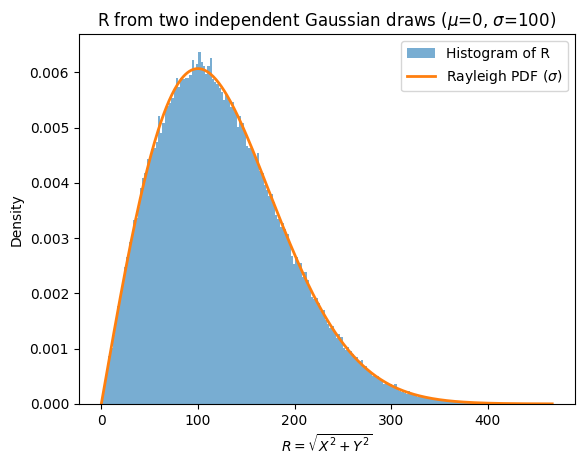

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
mu = 0.0
sigma = 100.0        # If you have FWHM instead, set: sigma = FWHM / (2*np.sqrt(2*np.log(2)))
n_samples = 200_000  # number of (X,Y) pairs

# Reproducible RNG
rng = np.random.default_rng(12345)

# --- Generate two independent Gaussian variables ---
X = rng.normal(mu, sigma, size=n_samples)
Y = rng.normal(mu, sigma, size=n_samples)

# --- Compute R = sqrt(X^2 + Y^2) ---
R = np.hypot(X, Y)   # numerically stable sqrt(X**2 + Y**2)

# --- (Optional) check moments ---
mean_theory = sigma * np.sqrt(np.pi / 2)
sd_theory = sigma * np.sqrt((4 - np.pi) / 2)
print(f"Empirical mean(R) = {R.mean():.1f}")
print(f"Theoretical mean  = {mean_theory:.1f} (Rayleigh with parameter sigma)")
print(f"Empirical std(R)  = {R.std(ddof=1):.1f}")
print(f"Theoretical std   = {sd_theory:.1f}  (Rayleigh with parameter sigma)")

# --- Plot histogram of R and overlay Rayleigh PDF ---
fig, ax = plt.subplots()

# Histogram of R (Rayleigh-like)
counts, bins, _ = ax.hist(R, bins=200, density=True, alpha=0.6, label="Histogram of R")

# Rayleigh PDF for comparison
r_grid = np.linspace(0, R.max(), 500)
rayleigh_pdf = (r_grid / sigma**2) * np.exp(-r_grid**2 / (2 * sigma**2))
ax.plot(r_grid, rayleigh_pdf, linewidth=2, label="Rayleigh PDF ($\sigma$)")

ax.set_xlabel(r"$R=\sqrt{X^2+Y^2}$")
ax.set_ylabel("Density")
ax.set_title("R from two independent Gaussian draws ($\mu$=0, $\sigma$=100)")
ax.legend()
plt.show()
